In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dl        0.01
# dn        0.1
# dV        10
# pvol      0.1

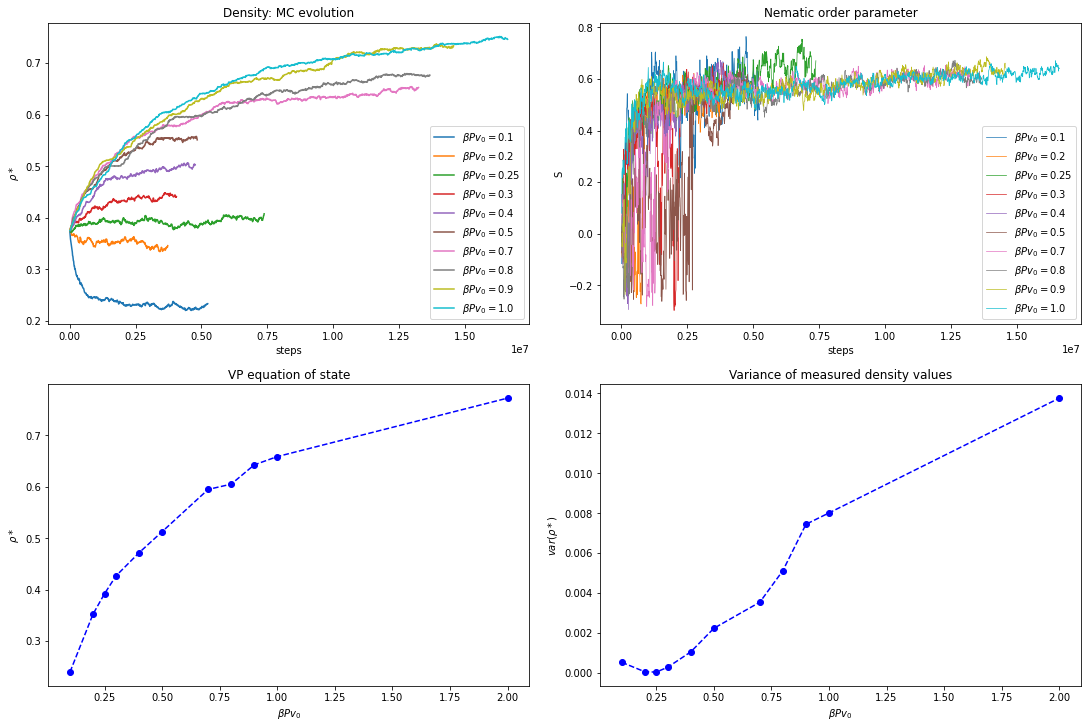

In [68]:
# create file list
dirr = '/home/hugens/shared/uni/modsim/modsim/project/output/NPT'
os.chdir(dirr)
file_list = os.listdir(os.getcwd())
beta_list = []
for i, d in enumerate(os.listdir(os.getcwd())):
    beta_list.append(float(d[4:]))
    file_list[i] = d + '/eos.dat'
    
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15, 10), constrained_layout=True)
axs = axs.ravel()

axs[0].set_title('Density: MC evolution')
axs[0].set_xlabel('steps')
axs[0].set_ylabel(r'$\rho*$')

axs[1].set_title('Nematic order parameter')
axs[1].set_xlabel('steps')
axs[1].set_ylabel('S')

axs[2].set_title('VP equation of state')
axs[2].set_xlabel(r'$\beta P v_{0}$')
axs[2].set_ylabel(r'$\rho*$')

axs[3].set_title('Variance of measured density values')
axs[3].set_xlabel(r'$\beta P v_{0}$')
axs[3].set_ylabel(r'$var(\rho*)$')

avg_rhos = np.zeros(len(beta_list))
var_rhos = np.zeros(len(beta_list))
avg_Ss   = np.zeros(len(beta_list))

measure_steps = 10000
# cutoff = 322

for i, file in enumerate(file_list):
    steps, rhos, Ss = np.loadtxt(file, skiprows=1).transpose()
#     steps, rhos, Ss = steps[:cutoff], rhos[:cutoff], Ss[:cutoff]
    steps = steps*1e4
    avg_rhos[i] = np.mean(rhos[-measure_steps:])
#     avg_rhos[i] = rhos[-1]
    var_rhos[i] = np.var(rhos[-measure_steps:])
#     avg_Ss[i] = np.mean(Ss[-measure_steps:])
    if beta_list[i] != 2:
        axs[0].plot(steps, rhos, label = r'$\beta Pv_{0} = $' + str(beta_list[i]))
        axs[1].plot(steps, Ss, label = r'$\beta Pv_{0} = $' + str(beta_list[i]), linewidth=0.7)

axs[2].plot(beta_list, avg_rhos, 'bo')
axs[2].plot(beta_list, avg_rhos, 'b--')
axs[3].plot(beta_list, var_rhos, 'bo')
axs[3].plot(beta_list, var_rhos, 'b--')

axs[0].legend()
axs[1].legend()

plt.savefig('../../figures/NPT.png', dpi=100)

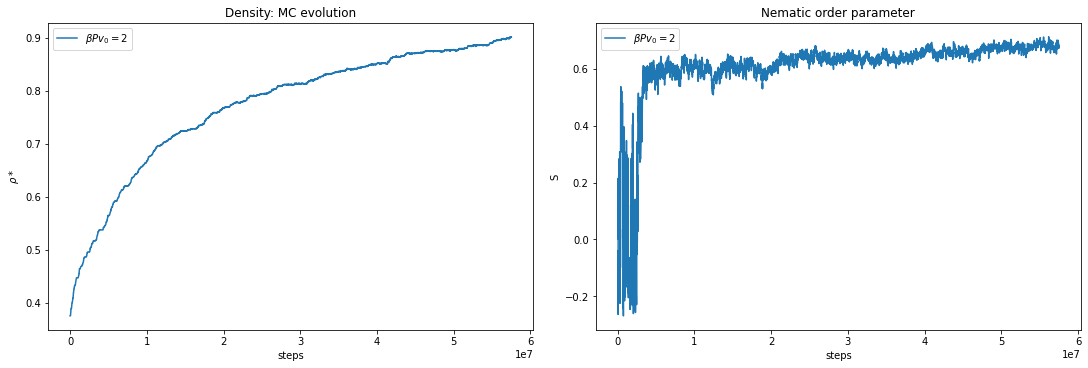

In [28]:
# create file list
file = '/home/hugens/shared/uni/modsim/modsim/project/output/NPT/NPT_002.000000/eos.dat'
    
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15, 5), constrained_layout=True)
axs = axs.ravel()

axs[0].set_title('Density: MC evolution')
axs[0].set_xlabel('steps')
axs[0].set_ylabel(r'$\rho*$')

axs[1].set_title('Nematic order parameter')
axs[1].set_xlabel('steps')
axs[1].set_ylabel('S')


steps, rhos, Ss = np.loadtxt(file, skiprows=1).transpose()
steps = steps*1e4

axs[0].plot(steps, rhos, label = r'$\beta Pv_{0} = $2')
axs[1].plot(steps, Ss, label = r'$\beta Pv_{0} = $2')

axs[0].legend()
axs[1].legend()

plt.savefig('../../figures/NPT2.png', dpi=100)

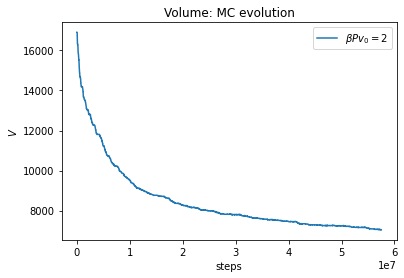

In [50]:
N = 666
L=3
D=1
v0 = np.pi * (L * pow(D, 2) / 4 + pow(D, 3) / 6);
rho_cp = 2 / (np.sqrt(2) + (L/D)*np.sqrt(3));


# create file list
file = '/home/hugens/shared/uni/modsim/modsim/project/output/NPT/NPT_002.000000/eos.dat'

plt.title('Volume: MC evolution')
plt.xlabel('steps')
plt.ylabel(r'$V$')

steps, rhos, Ss = np.loadtxt(file, skiprows=1).transpose()
steps = steps*1e4
Vs = N * v0 / (rhos * rho_cp)

plt.plot(steps, Vs, label = r'$\beta Pv_{0} = $2')

plt.legend()

plt.savefig('../../figures/vs.png', dpi=100)

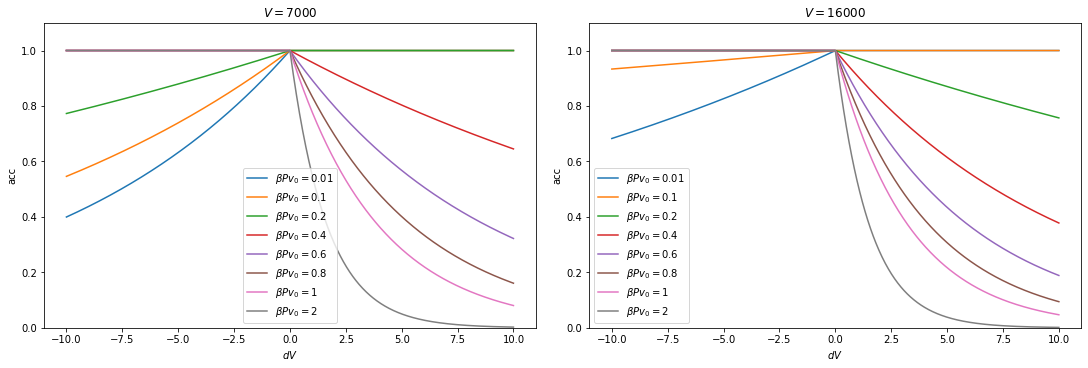

In [66]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15, 5), constrained_layout=True)
axs = axs.ravel()

N = 666
L=3
D=1
v0 = np.pi * (L * pow(D, 2) / 4 + pow(D, 3) / 6);
V1 = 16000
V2 = 7000
dv = np.linspace(-10, 10, 1000)
for b in [1e-2, 1e-1, 0.2, 0.4, 0.6, 0.8, 1, 2]:
    betaP = b/v0
    axs[1].plot(dv, np.minimum(1, np.exp(-betaP*(dv) + N*np.log(1+dv/V1))), label = r'$\beta Pv_{0} = $' + str(b))
    axs[0].plot(dv, np.minimum(1, np.exp(-betaP*(dv) + N*np.log(1+dv/V2))), label = r'$\beta Pv_{0} = $' + str(b))
    
axs[0].set_ylim(0, 1.1)
axs[1].set_ylim(0, 1.1)

axs[1].set_title(r'$V = $'+str(V1))
axs[0].set_title(r'$V = $'+str(V2))
axs[0].set_xlabel(r'$dV$')
axs[0].set_ylabel('acc')
axs[1].set_xlabel(r'$dV$')
axs[1].set_ylabel('acc')
axs[0].legend()
axs[1].legend()
plt.savefig('../../figures/acc.png', dpi=100)